In [2]:
import pandas as pd
import numpy as np

In [3]:
# ANOVA 하기 위한 코드
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 오류 무시
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

### month_long_term_frgn 장기체류

In [7]:
long_df = pd.read_csv('month_long_term_frgn.csv')
long_df

,m,nationality,emd_cd,emd_nm,count_num,sum_resd_pop_cnt,sum_work_pop_cnt,sum_visit_pop_cnt
0,2018-01,AUS,50110590,건입동,33,0.0000,0.0000,193.1805
1,2018-01,AUS,50110256,구좌읍,40,0.0000,0.0000,251.2195
2,2018-01,AUS,50130253,남원읍,107,0.0000,0.0000,648.0345
3,2018-01,AUS,50110660,노형동,761,11855.9924,738.9594,2612.7042
4,2018-01,AUS,50130590,대륜동,563,2701.0357,1576.0168,200.4630
...,...,...,...,...,...,...,...,...
52233,2021-06,VNM,50130320,표선면,919,2646.5554,0.0000,7603.5847
52234,2021-06,VNM,50110310,한경면,1366,45349.6490,1121.2861,75816.8162
52235,2021-06,VNM,50110250,한림읍,1440,97147.6156,3820.6787,61844.2041
52236,2021-06,VNM,50110600,화북동,1375,13436.5104,2574.8044,8554.9721


##### sum_resd_pop_cnt ~ nationality  0

In [8]:
# 일원배치 분산분석
model1 = ols('sum_resd_pop_cnt ~ C(nationality)', long_df).fit()
print(anova_lm(model1))
#기각 (의미있음)

                     df        sum_sq       mean_sq           F  PR(>F)
C(nationality)     30.0  2.744709e+13  9.149030e+11  428.764261     0.0
Residual        52207.0  1.114000e+14  2.133814e+09         NaN     NaN


In [9]:
# 다중비교 (Tukey)

posthoc1 = pairwise_tukeyhsd(long_df['sum_resd_pop_cnt'], long_df['nationality'], alpha=0.05)
print(posthoc1)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
   AUS    BGD   -1311.6941    0.9   -7217.4962    4594.1079  False
   AUS    CAN    2741.4232    0.9   -3046.8233    8529.6697  False
   AUS    CHN  123890.1723  0.001  118101.9258  129678.4188   True
   AUS    DEU    -2085.929    0.9   -7957.4773    3785.6193  False
   AUS    EGY   -2196.3489    0.9   -9727.0215    5334.3237  False
   AUS    ETC    3840.6067 0.7555   -1947.6397    9628.8532  False
   AUS    FRA   -1828.6695    0.9   -7650.4241    3993.0852  False
   AUS    GBR    1599.7012    0.9   -4191.7556     7391.158  False
   AUS    IDN   10705.8087  0.001    4917.5622   16494.0552   True
   AUS    IND    -282.3695    0.9    -6081.907     5517.168  False
   AUS    JPN    1150.5625    0.9    -4637.684    6938.8089  False
   AUS    KAZ   -1573.2897    0.9   -7391.7155    4245.1362  F

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10


<AxesSubplot:xlabel='nationality', ylabel='sum_resd_pop_cnt'>

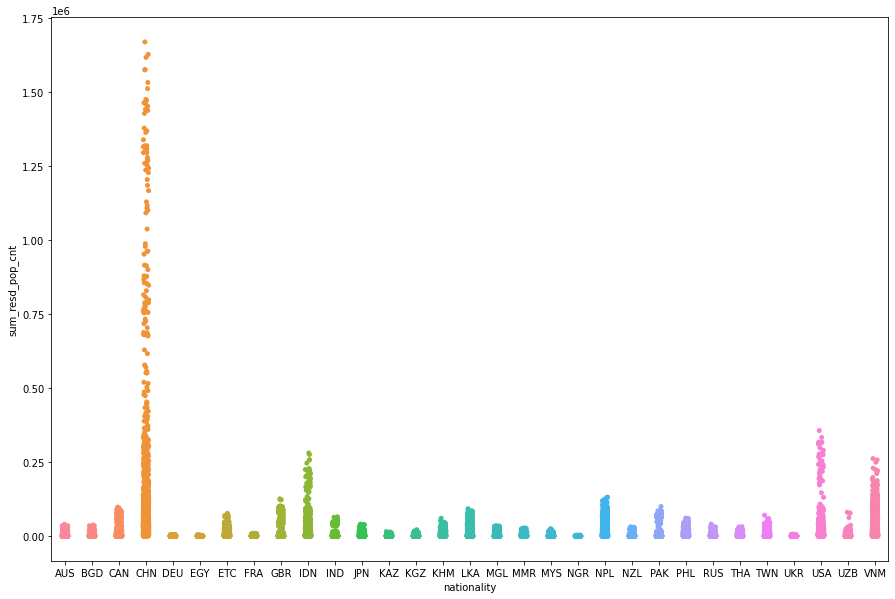

In [27]:
x = long_df['nationality']
y = long_df['sum_resd_pop_cnt']
sns.stripplot(x, y, data=long_df)


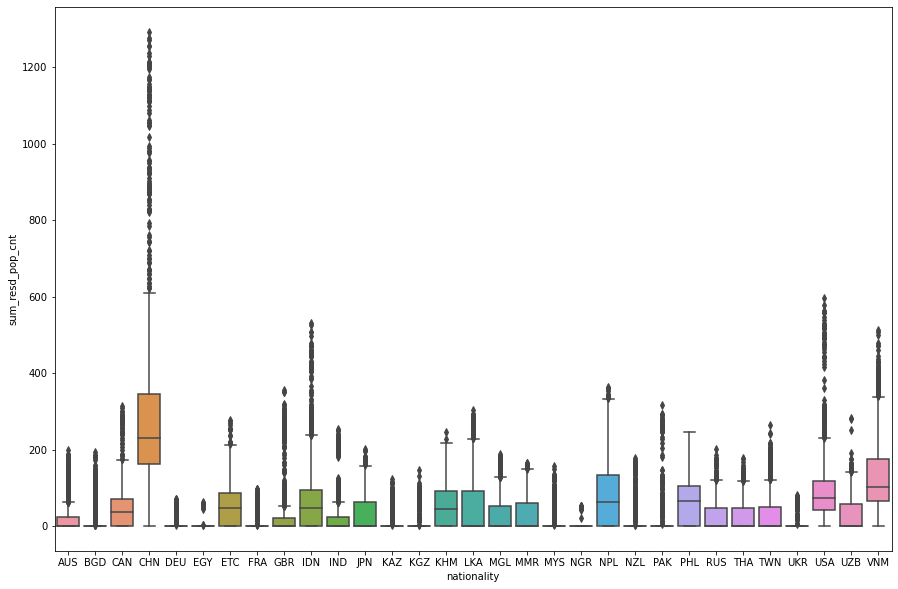

In [48]:
x = long_df['nationality']
y = np.sqrt(long_df['sum_resd_pop_cnt'])


sns.boxplot(x, y, data=long_df)


#plt.ylim(0,0.6)
plt.show()

# AUS GBR IND (3)
# JPN MGL MMR RUS THA TWN LZB (7)
# BGD DEU EGY FRA KAZ KGZ MYS NGR NZL PAK UKR (11)
# CAN ETC IDN KHM LKA NPL PHL USA(8)
# CHN VNM (2)

In [ ]:
# GROUP 1 : AUS GBR IND (3)
# GROUP 2 : JPN MGL MMR RUS THA TWN LZB (7)
# GROUP 3 : BGD DEU EGY FRA KAZ KGZ MYS NGR NZL PAK UKR (11)
# GROUP 4 : CAN ETC IDN KHM LKA NPL PHL USA VNM (10)
# GROUP 5 : CHN (1)

In [52]:
# GROUP 1
a = long_df[long_df['nationality']=='AUS']
b = long_df[long_df['nationality']=='GBR']
c = long_df[long_df['nationality']=='IND']
G1 = pd.concat([a,b])
G1 = pd.concat([G1,c])

In [53]:
# 일원배치 분산분석(mct_cat_nm)
model = ols('sum_resd_pop_cnt ~ C(nationality)', G1).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G1['sum_resd_pop_cnt'], G1['nationality'], alpha=0.05)
print(posthoc)

                    df        sum_sq       mean_sq          F        PR(>F)
C(nationality)     2.0  3.708067e+09  1.854034e+09  18.469638  1.014072e-08
Residual        5396.0  5.416655e+11  1.003828e+08        NaN           NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   AUS    GBR  1599.7012  0.001   817.5133  2381.8891   True
   AUS    IND  -282.3695 0.6601 -1065.6488   500.9097  False
   GBR    IND -1882.0707  0.001 -2665.6747 -1098.4667   True
------------------------------------------------------------


In [57]:
# GROUP 2 : JPN MGL MMR RUS THA TWN LZB (7)
a = long_df[long_df['nationality']=='JPN']
b = long_df[long_df['nationality']=='MGL']
c = long_df[long_df['nationality']=='MMR']
d = long_df[long_df['nationality']=='RUS']
e = long_df[long_df['nationality']=='THA']
f = long_df[long_df['nationality']=='TWN']
g = long_df[long_df['nationality']=='LZB']

G2 = pd.concat([a,b,c,d,e,f,g])

In [58]:
# 일원배치 분산분석(mct_cat_nm)
model = ols('sum_resd_pop_cnt ~ C(nationality)', G2).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G2['sum_resd_pop_cnt'], G2['nationality'], alpha=0.05)
print(posthoc)

                     df        sum_sq       mean_sq          F        PR(>F)
C(nationality)      5.0  4.760644e+09  9.521289e+08  30.059118  1.900433e-30
Residual        10795.0  3.419339e+11  3.167521e+07        NaN           NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   JPN    MGL   -757.357  0.001 -1291.8373  -222.8767   True
   JPN    MMR  -622.2647 0.0117 -1156.6705    -87.859   True
   JPN    RUS -1612.2286  0.001 -2146.4855 -1077.9716   True
   JPN    THA -1512.7179  0.001 -2047.1981  -978.2376   True
   JPN    TWN   110.6348    0.9  -423.3996   644.6691  False
   MGL    MMR   135.0923    0.9  -399.9807   670.1653  False
   MGL    RUS  -854.8716  0.001 -1389.7959  -319.9472   True
   MGL    THA  -755.3608  0.001 -1290.5082  -220.2135   True
   MGL    TWN   867.9918  0.001   333.2898  1402.6937   True
   MMR    RUS  -989.9639  0.001 -1524

In [59]:
# GROUP 3 : BGD DEU EGY FRA KAZ KGZ MYS NGR NZL PAK UKR (11)
a = long_df[long_df['nationality']=='BGD']
b = long_df[long_df['nationality']=='DEU']
c = long_df[long_df['nationality']=='EGY']
d = long_df[long_df['nationality']=='FRA']
e = long_df[long_df['nationality']=='KAZ']
f = long_df[long_df['nationality']=='KGZ']
g = long_df[long_df['nationality']=='MYS']
h = long_df[long_df['nationality']=='NGR']
i = long_df[long_df['nationality']=='NZL']
j = long_df[long_df['nationality']=='PAK']
k = long_df[long_df['nationality']=='UKR']

G3 = pd.concat([a,b,c,d,e,f,g,h,i,j,k])

In [60]:
# 일원배치 분산분석(mct_cat_nm)
model = ols('sum_resd_pop_cnt ~ C(nationality)', G3).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G3['sum_resd_pop_cnt'], G3['nationality'], alpha=0.05)
print(posthoc)

                     df        sum_sq       mean_sq          F        PR(>F)
C(nationality)     10.0  5.950430e+09  5.950430e+08  35.009825  2.259310e-68
Residual        16174.0  2.749007e+11  1.699646e+07        NaN           NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   BGD    DEU  -774.2349  0.001 -1231.0927   -317.377   True
   BGD    EGY  -884.6547  0.001 -1466.2141  -303.0953   True
   BGD    FRA  -516.9753 0.0109   -970.107   -63.8437   True
   BGD    KAZ  -261.5955 0.7158  -714.4781   191.2871  False
   BGD    KGZ  -325.2489  0.481  -793.5623   143.0646  False
   BGD    MYS  -348.5537 0.3257  -803.8431   106.7357  False
   BGD    NGR  -881.6149  0.001 -1541.9155  -221.3144   True
   BGD    NZL   130.5154    0.9  -322.6787   583.7095  False
   BGD    PAK  1276.6711  0.001   823.5394  1729.8028   True
   BGD    UKR  -805.9858  0.001 -1311

In [69]:
# GROUP 4 : CAN ETC IDN KHM LKA NPL PHL USA, VNM(9)
a = long_df[long_df['nationality']=='CAN']
b = long_df[long_df['nationality']=='ETC']
c = long_df[long_df['nationality']=='IDN']
d = long_df[long_df['nationality']=='KHM']
e = long_df[long_df['nationality']=='LKA']
f = long_df[long_df['nationality']=='NPL']
g = long_df[long_df['nationality']=='PHL']
h = long_df[long_df['nationality']=='USA']
i = long_df[long_df['nationality']=='VNM']

G4 = pd.concat([a,b,c,d,e,f,g,h,i])

In [70]:
# 일원배치 분산분석(mct_cat_nm)
model = ols('sum_resd_pop_cnt ~ C(nationality)', G4).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G4['sum_resd_pop_cnt'], G4['nationality'], alpha=0.05)
print(posthoc)

                     df        sum_sq       mean_sq           F         PR(>F)
C(nationality)      8.0  7.153159e+11  8.941448e+10  152.646051  6.478894e-249
Residual        16238.0  9.511627e+12  5.857635e+08         NaN            NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   CAN    ETC  1099.1836    0.9 -1399.3269   3597.694  False
   CAN    IDN  7964.3855  0.001  5465.8751 10462.8959   True
   CAN    KHM   650.1765    0.9  -1849.373   3149.726  False
   CAN    LKA  3904.3766  0.001  1405.1738  6403.5794   True
   CAN    NPL  9293.1887  0.001  6794.6783 11791.6991   True
   CAN    PHL  2583.3711 0.0364    84.1683  5082.5739   True
   CAN    USA 11574.2522  0.001  9075.7418 14072.7627   True
   CAN    VNM 21756.5036  0.001 19257.9932  24255.014   True
   ETC    IDN   6865.202  0.001  4366.6916  9363.7124   True
   ETC    KHM  -449.0071    0.9

In [63]:
# GROUP 5 : CHN VNM (2)
a = long_df[long_df['nationality']=='CHN']

##### sum_work_pop_cnt ~ nationality  0

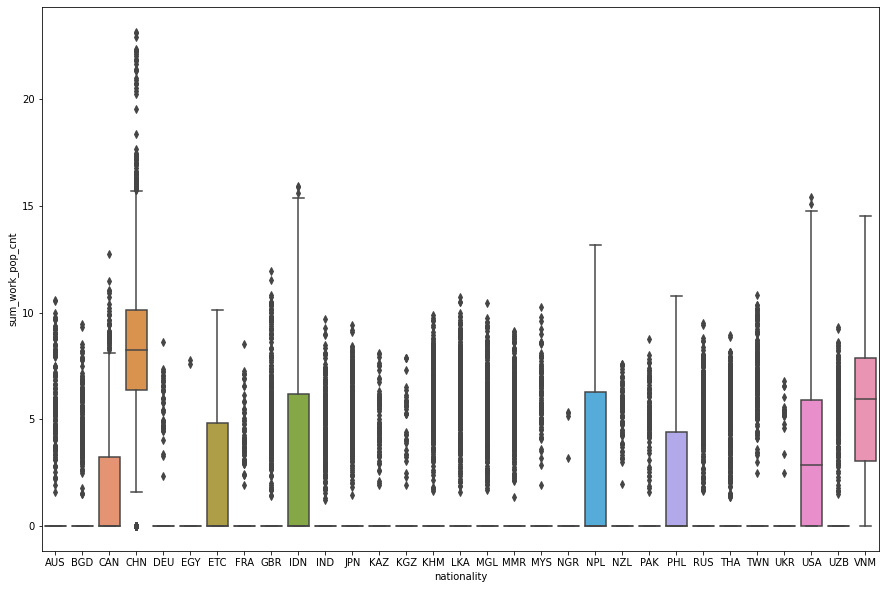

In [68]:
x = long_df['nationality']
y = np.sqrt(np.sqrt(long_df['sum_work_pop_cnt']))


sns.boxplot(x, y, data=long_df)


#plt.ylim(0,0.6)
plt.show()



In [ ]:
# GROUP 1 : AUS BGD DEU EGY FRA GBR IND JPN KAZ KGZ KHM LKA MGL MMR MYS NGR NZL PAK RUS THA TWN UKR UZB (23)
# GROUP 2 : CAN PHL (2)
# GROUP 3 : IDN NPL USA VNM (4)
# GROUP 4 : CHN

In [72]:
# GROUP 1 : AUS BGD DEU EGY FRA GBR IND JPN KAZ KGZ KHM LKA MGL MMR MYS NGR NZL PAK RUS THA TWN UKR UZB (23)
a = long_df[long_df['nationality']=='AUS']
b = long_df[long_df['nationality']=='BGD']
c = long_df[long_df['nationality']=='DEU']
d = long_df[long_df['nationality']=='EGY']
e = long_df[long_df['nationality']=='FRA']
f = long_df[long_df['nationality']=='GBR']
g = long_df[long_df['nationality']=='IND']
h = long_df[long_df['nationality']=='JPN']
i = long_df[long_df['nationality']=='KAZ']
j = long_df[long_df['nationality']=='KGZ']
k = long_df[long_df['nationality']=='KHM']
l = long_df[long_df['nationality']=='LKA']
m = long_df[long_df['nationality']=='MGL']
n = long_df[long_df['nationality']=='MMR']
o = long_df[long_df['nationality']=='MYS']
p = long_df[long_df['nationality']=='NGR']
q = long_df[long_df['nationality']=='NZL']
r = long_df[long_df['nationality']=='PAK']
s = long_df[long_df['nationality']=='RUS']
t = long_df[long_df['nationality']=='THA']
u = long_df[long_df['nationality']=='TWN']
v = long_df[long_df['nationality']=='UKR']
w = long_df[long_df['nationality']=='UZB']

G1 = pd.concat([a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w])

In [73]:
# 일원배치 분산분석(mct_cat_nm)
model = ols('sum_work_pop_cnt ~ C(nationality)', G1).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G1['sum_work_pop_cnt'], G1['nationality'], alpha=0.05)
print(posthoc)

                     df        sum_sq       mean_sq          F         PR(>F)
C(nationality)     22.0  7.175016e+08  3.261371e+07  50.756026  6.809978e-219
Residual        37769.0  2.426879e+10  6.425584e+05        NaN            NaN
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
   AUS    BGD -105.5899 0.0199 -204.0228   -7.1571   True
   AUS    DEU  -174.142  0.001  -272.004  -76.2801   True
   AUS    EGY -197.8999  0.001 -323.4147  -72.3851   True
   AUS    FRA -183.7722  0.001 -280.8042  -86.7402   True
   AUS    GBR  134.7442  0.001   38.2172  231.2712   True
   AUS    IND  -56.0938 0.8974 -152.7555   40.5679  False
   AUS    JPN    9.3555    0.9   -87.118  105.8291  False
   AUS    KAZ -165.8161  0.001 -262.7926  -68.8396   True
   AUS    KGZ -181.7246  0.001 -282.1364  -81.3129   True
   AUS    KHM   136.175  0.001   39.6614  232.6886   True
   AUS    LK

In [75]:
# GROUP 2 : CAN PHL (2)
a = long_df[long_df['nationality']=='CAN']
b = long_df[long_df['nationality']=='PHL']
G2 = pd.concat([a,b])

In [76]:
# 일원배치 분산분석(mct_cat_nm)
model = ols('sum_work_pop_cnt ~ C(nationality)', G2).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G2['sum_work_pop_cnt'], G2['nationality'], alpha=0.05)
print(posthoc)

                    df        sum_sq       mean_sq         F    PR(>F)
C(nationality)     1.0  1.065238e+07  1.065238e+07  4.949772  0.026156
Residual        3608.0  7.764759e+09  2.152095e+06       NaN       NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper   reject
-----------------------------------------------------
   CAN    PHL 108.6425 0.0262 12.9008 204.3842   True
-----------------------------------------------------


In [77]:
# GROUP 3 : IDN NPL USA VNM (4)
a = long_df[long_df['nationality']=='IDN']
b = long_df[long_df['nationality']=='NPL']
c = long_df[long_df['nationality']=='USA']
d = long_df[long_df['nationality']=='VNM']
G3 = pd.concat([a,b,c,d])

In [78]:
# 일원배치 분산분석(mct_cat_nm)
model = ols('sum_work_pop_cnt ~ C(nationality)', G3).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G3['sum_work_pop_cnt'], G3['nationality'], alpha=0.05)
print(posthoc)

                    df        sum_sq       mean_sq          F        PR(>F)
C(nationality)     3.0  3.947266e+09  1.315755e+09  49.377755  1.395121e-31
Residual        7220.0  1.923893e+11  2.664672e+07        NaN           NaN
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
   IDN    NPL -983.7943  0.001 -1425.2091 -542.3796   True
   IDN    USA -856.5824  0.001 -1297.9972 -415.1677   True
   IDN    VNM  853.0794  0.001   411.6646 1294.4941   True
   NPL    USA  127.2119 0.8695  -314.2029  568.6267  False
   NPL    VNM 1836.8737  0.001  1395.4589 2278.2885   True
   USA    VNM 1709.6618  0.001   1268.247 2151.0766   True
----------------------------------------------------------


In [14]:
# 일원배치 분산분석
model2 = ols('sum_work_pop_cnt ~ C(nationality)', long_df).fit()
print(anova_lm(model2))
#기각 (의미있음)

                     df        sum_sq       mean_sq           F  PR(>F)
C(nationality)     30.0  2.652702e+11  8.842341e+09  268.704718     0.0
Residual        52207.0  1.717990e+12  3.290728e+07         NaN     NaN


In [15]:
# 다중비교 (Tukey)

posthoc2 = pairwise_tukeyhsd(long_df['sum_work_pop_cnt'], long_df['nationality'], alpha=0.05)
print(posthoc2)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   AUS    BGD   -105.5899    0.9   -838.9996    627.8197  False
   AUS    CAN    268.5608    0.9   -450.2503    987.3718  False
   AUS    CHN  11958.3432  0.001  11239.5321  12677.1543   True
   AUS    DEU    -174.142    0.9   -903.2979    555.0138  False
   AUS    EGY   -197.8999    0.9  -1133.0935    737.2936  False
   AUS    ETC    332.1576    0.9   -386.6535   1050.9686  False
   AUS    FRA   -183.7722    0.9   -906.7444    539.2001  False
   AUS    GBR    134.7442    0.9   -584.4656    853.9539  False
   AUS    IDN   2167.0131  0.001   1448.2021   2885.8242   True
   AUS    IND    -56.0938    0.9   -776.3071    664.1194  False
   AUS    JPN      9.3555    0.9   -709.4555    728.1666  False
   AUS    KAZ   -165.8161    0.9    -888.375    556.7428  False
   AUS    KGZ   -181.7246    0.9   -929.

##### sum_visit_pop_cnt ~ nationality  0

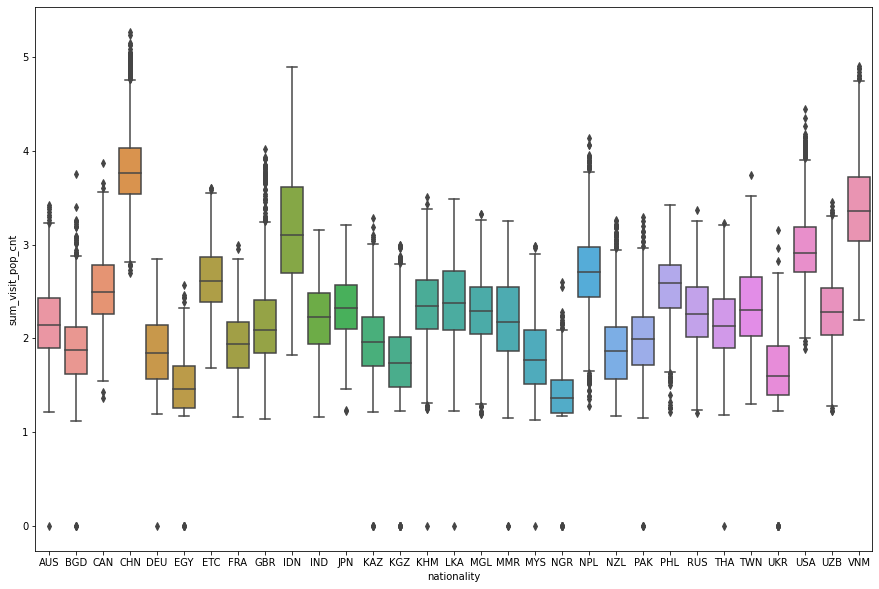

In [86]:
x = long_df['nationality']
y = np.sqrt(np.sqrt(np.sqrt(long_df['sum_visit_pop_cnt'])))


sns.boxplot(x, y, data=long_df)


#plt.ylim(0,0.6)
plt.show()


In [83]:
# 여기부터 안함 !
# GROUP 1 : EGY NGR UKR (3)
# GROUP 2 : BGD DEU FRA KAZ KGZ MYS NZL PAK (8)
# GROUP 3 : AUS GBR IND JPN KHM LKA MGL MMR RUS THA TWN UZB (!2)
# GROUP 4 : CAN ETC NPL USA PHL (5)
# GROUP 5 : CHN IDN VNM (3)

In [87]:
# GROUP 1 : EGY NGR UKR (3)
a = long_df[long_df['nationality']=='EGY']
b = long_df[long_df['nationality']=='NGR']
c = long_df[long_df['nationality']=='UKR']
G1 = pd.concat([a,b,c])

In [88]:
# 일원배치 분산분석(mct_cat_nm)
model = ols('sum_visit_pop_cnt ~ C(nationality)', G1).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G1['sum_visit_pop_cnt'], G1['nationality'], alpha=0.05)
print(posthoc)

                    df        sum_sq       mean_sq          F        PR(>F)
C(nationality)     2.0  8.590487e+06  4.295244e+06  38.594585  3.131613e-17
Residual        2464.0  2.742219e+08  1.112914e+05        NaN           NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
   EGY    NGR -23.0078 0.4435 -67.2446  21.2289  False
   EGY    UKR 107.4932  0.001  71.0437 143.9428   True
   NGR    UKR 130.5011  0.001  89.6554 171.3467   True
------------------------------------------------------


In [89]:
# GROUP 2 : BGD DEU FRA KAZ KGZ MYS NZL PAK (8)
a = long_df[long_df['nationality']=='BGD']
b = long_df[long_df['nationality']=='DEU']
c = long_df[long_df['nationality']=='FRA']
d = long_df[long_df['nationality']=='KAZ']
f = long_df[long_df['nationality']=='KGZ']
g = long_df[long_df['nationality']=='MYS']
h = long_df[long_df['nationality']=='NZL']
i = long_df[long_df['nationality']=='PAK']
G2 = pd.concat([a,b,c,d,f,g,h,i])

In [90]:
## 일원배치 분산분석(mct_cat_nm)
model = ols('sum_visit_pop_cnt ~ C(nationality)', G2).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G2['sum_visit_pop_cnt'], G2['nationality'], alpha=0.05)
print(posthoc)

                     df        sum_sq       mean_sq          F        PR(>F)
C(nationality)      7.0  8.959501e+07  1.279929e+07  12.745756  2.034839e-16
Residual        13710.0  1.376758e+10  1.004200e+06        NaN           NaN
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
   BGD    DEU -138.9216 0.0015 -243.4898  -34.3534   True
   BGD    FRA  -92.1956 0.1246  -195.911   11.5197  False
   BGD    KAZ   27.1114    0.9  -76.5469  130.7697  False
   BGD    KGZ -193.2543  0.001 -300.4445   -86.064   True
   BGD    MYS -147.5326  0.001 -251.7418  -43.3234   True
   BGD    NZL   17.0748    0.9  -86.6548  120.8044  False
   BGD    PAK    1.4242    0.9 -102.2912  105.1395  False
   DEU    FRA    46.726 0.8582  -56.3943  149.8462  False
   DEU    KAZ   166.033  0.001     62.97   269.096   True
   DEU    KGZ  -54.3327 0.7558 -160.9473   52.2819  False
   DEU    MYS  

In [91]:
# GROUP 3 : AUS GBR IND JPN KHM LKA MGL MMR RUS THA TWN UZB (!2)
a = long_df[long_df['nationality']=='AUS']
b = long_df[long_df['nationality']=='GBR']
c = long_df[long_df['nationality']=='IND']
d = long_df[long_df['nationality']=='JPN']
f = long_df[long_df['nationality']=='KHM']
g = long_df[long_df['nationality']=='LKA']
h = long_df[long_df['nationality']=='MGL']
i = long_df[long_df['nationality']=='MMR']
j = long_df[long_df['nationality']=='RUS']
k = long_df[long_df['nationality']=='THA']
l = long_df[long_df['nationality']=='TWN']
m = long_df[long_df['nationality']=='UZB']
G3 = pd.concat([a,b,c,d,f,g,h,i,j,k,l,m])

In [92]:
## 일원배치 분산분석(mct_cat_nm)
model = ols('sum_visit_pop_cnt ~ C(nationality)', G3).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G3['sum_visit_pop_cnt'], G3['nationality'], alpha=0.05)
print(posthoc)

                     df        sum_sq       mean_sq          F        PR(>F)
C(nationality)     11.0  3.547185e+09  3.224714e+08  42.157698  1.817355e-91
Residual        21595.0  1.651838e+11  7.649169e+06        NaN           NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   AUS    GBR   780.3295  0.001   479.3014  1081.3575   True
   AUS    IND    -49.903    0.9  -351.3511   251.5451  False
   AUS    JPN   301.1458 0.0495     0.2846   602.0071   True
   AUS    KHM   747.4205  0.001   446.4342  1048.4068   True
   AUS    LKA  1237.1962  0.001   936.2516  1538.1408   True
   AUS    MGL     375.04 0.0028    73.8024   676.2776   True
   AUS    MMR   116.9237    0.9  -184.2719   418.1193  False
   AUS    RUS   207.6522 0.5086   -93.4596   508.7639  False
   AUS    THA  -158.0912  0.847  -459.3288   143.1464  False
   AUS    TWN    811.282  0.001   510

In [93]:
# GROUP 4 : CAN ETC NPL USA PHL (5)
a = long_df[long_df['nationality']=='CAN']
b = long_df[long_df['nationality']=='ETC']
c = long_df[long_df['nationality']=='NPL']
d = long_df[long_df['nationality']=='USA']
f = long_df[long_df['nationality']=='PHL']
G4 = pd.concat([a,b,c,d,f,g,h,i,j,k,l,m])

In [94]:
## 일원배치 분산분석(mct_cat_nm)
model = ols('sum_visit_pop_cnt ~ C(nationality)', G4).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G4['sum_visit_pop_cnt'], G4['nationality'], alpha=0.05)
print(posthoc)

                     df        sum_sq       mean_sq           F  PR(>F)
C(nationality)     11.0  1.131972e+11  1.029065e+10  400.150863     0.0
Residual        21615.0  5.558715e+11  2.571693e+07         NaN     NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   CAN    ETC   755.8296  0.001   204.2496  1307.4096   True
   CAN    LKA  -451.4024 0.2391 -1003.1352   100.3305  False
   CAN    MGL -1313.5586  0.001 -1865.8287  -761.2884   True
   CAN    MMR -1571.6749  0.001 -2123.8681 -1019.4817   True
   CAN    NPL  2797.2065  0.001  2245.6266  3348.7865   True
   CAN    PHL  -134.1817    0.9  -685.9145   417.5512  False
   CAN    RUS -1480.9464  0.001 -2032.9859   -928.907   True
   CAN    THA -1846.6898  0.001   -2398.96 -1294.4197   True
   CAN    TWN  -877.3166  0.001 -1429.1259  -325.5072   True
   CAN    USA  6435.6479  0.001  5884.0679  6987.227

In [95]:
# GROUP 5 : CHN IDN VNM (3)
a = long_df[long_df['nationality']=='CHN']
b = long_df[long_df['nationality']=='IDN']
c = long_df[long_df['nationality']=='VNM']

G5 = pd.concat([a,b,c])

In [96]:
## 일원배치 분산분석(mct_cat_nm)
model = ols('sum_visit_pop_cnt ~ C(nationality)', G5).fit()
print(anova_lm(model))
# 다중비교 (Tukey)
posthoc = pairwise_tukeyhsd(G5['sum_visit_pop_cnt'], G5['nationality'], alpha=0.05)
print(posthoc)

                    df        sum_sq       mean_sq           F         PR(>F)
C(nationality)     2.0  1.700391e+12  8.501955e+11  316.096553  1.448168e-130
Residual        5415.0  1.456456e+13  2.689670e+09         NaN            NaN
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   CHN    IDN -39983.5633  0.001 -44029.5982 -35937.5285   True
   CHN    VNM -34595.5795  0.001 -38641.6144 -30549.5447   True
   IDN    VNM   5387.9838 0.0051   1341.9489   9434.0187   True
---------------------------------------------------------------


In [16]:
# 일원배치 분산분석
model2 = ols('sum_visit_pop_cnt ~ C(nationality)', long_df).fit()
print(anova_lm(model2))
#기각 (의미있음)

                     df        sum_sq       mean_sq         F  PR(>F)
C(nationality)     30.0  8.358936e+12  2.786312e+11  954.7382     0.0
Residual        52207.0  1.523611e+13  2.918404e+08       NaN     NaN


In [17]:
# 다중비교 (Tukey)

posthoc3 = pairwise_tukeyhsd(long_df['sum_visit_pop_cnt'], long_df['nationality'], alpha=0.05)
print(posthoc3)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   AUS    BGD    -625.087    0.9  -2809.1913   1559.0173  False
   AUS    CAN   1688.5986 0.4287   -452.0309   3829.2281  False
   AUS    CHN  62029.4933  0.001  59888.8638  64170.1228   True
   AUS    DEU   -764.0086    0.9   -2935.445   1407.4278  False
   AUS    EGY   -1079.101    0.9  -3864.1205   1705.9186  False
   AUS    ETC   2444.4282 0.0065    303.7987   4585.0577   True
   AUS    FRA   -717.2827    0.9  -2870.3042   1435.7389  False
   AUS    GBR    780.3295    0.9  -1361.4873   2922.1462  False
   AUS    IDN  22045.9299  0.001  19905.3005  24186.5594   True
   AUS    IND     -49.903    0.9  -2194.7082   2094.9021  False
   AUS    JPN    301.1458    0.9  -1839.4836   2441.7753  False
   AUS    KAZ   -597.9756    0.9  -2749.7661   1553.8149  False
   AUS    KGZ   -818.3413    0.9  -3046.

### month_short_term_frgn 단기체류

In [18]:
short_df = pd.read_csv('month_short_term_frgn.csv')
short_df

,m,nationality,count_num,emd_cd,emd_nm,visit_pop_cnt
0,2018-01,CHN,744,50110590,건입동,30589.4398
1,2018-01,CHN,744,50110256,구좌읍,26691.1513
2,2018-01,CHN,744,50130253,남원읍,179846.0273
3,2018-01,CHN,744,50110660,노형동,145583.1902
4,2018-01,CHN,742,50130590,대륜동,22743.8459
...,...,...,...,...,...,...
16250,2021-06,VNM,126,50110320,추자면,36.6789
16251,2021-06,VNM,39,50130320,표선면,9.2223
16252,2021-06,VNM,45,50110310,한경면,11.1088
16253,2021-06,VNM,37,50110250,한림읍,7.7552


##### visit_pop_cnt ~ nationality  0

In [19]:
# 일원배치 분산분석
model4 = ols('visit_pop_cnt ~ C(nationality)', short_df).fit()
print(anova_lm(model4))
#기각 (의미있음)

                     df        sum_sq       mean_sq           F  PR(>F)
C(nationality)      9.0  6.856696e+12  7.618551e+11  198.921579     0.0
Residual        16245.0  6.221716e+13  3.829927e+09         NaN     NaN


In [20]:
# 다중비교 (Tukey)

posthoc4 = pairwise_tukeyhsd(short_df['visit_pop_cnt'], short_df['nationality'], alpha=0.05)
print(posthoc4)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   CHN    ETC -55866.4953  0.001 -62389.2586 -49343.7321   True
   CHN    HKG -65768.0644  0.001 -72415.6952 -59120.4336   True
   CHN    IDN -67639.9016  0.001 -74422.1089 -60857.6944   True
   CHN    JPN -61687.6364  0.001 -68526.7114 -54848.5614   True
   CHN    MYS -63253.2531  0.001 -70017.9348 -56488.5714   True
   CHN    SGP -66637.5296  0.001 -73460.5703 -59814.4889   True
   CHN    THA -66052.6574  0.001 -72723.2754 -59382.0393   True
   CHN    USA -66598.5518  0.001 -73128.6009 -60068.5026   True
   CHN    VNM -67396.5296  0.001 -74359.0947 -60433.9645   True
   ETC    HKG  -9901.5691  0.001 -16553.6369  -3249.5013   True
   ETC    IDN -11773.4063  0.001 -18559.9625  -4986.8501   True
   ETC    JPN  -5821.1411 0.1767 -12664.5289   1022.2468  False
   ETC    MYS  -7386.7578 0.0198 -14155.

### month_resident_pop 거주인구

In [97]:
resd_df = pd.read_csv('month_resident_pop.csv')
resd_df

,base_year,base_month,sex,emd_cd,emd_nm,count_num,sum_resid_pop_cnt,sum_foreign_pop_cnt,sum_total_pop_cnt
0,2018,1,남성,50110590,건입동,1,5085.0,146.0,5231.0
1,2018,1,남성,50110256,구좌읍,1,7965.0,368.0,8333.0
2,2018,1,남성,50130253,남원읍,1,9806.0,428.0,10234.0
3,2018,1,남성,50110660,노형동,1,26286.0,821.0,27107.0
4,2018,1,남성,50130590,대륜동,1,6836.0,83.0,6919.0
...,...,...,...,...,...,...,...,...,...
3607,2021,6,여성,50130320,표선면,1,6033.0,123.0,6156.0
3608,2021,6,여성,50110310,한경면,1,4531.0,100.0,4631.0
3609,2021,6,여성,50110250,한림읍,1,10341.0,1140.0,11481.0
3610,2021,6,여성,50110600,화북동,1,12238.0,161.0,12399.0


##### sum_resid_pop_cnt ~ sex  X 

In [98]:
# 일원배치 분산분석
model5 = ols('sum_resid_pop_cnt ~ C(sex)', resd_df).fit()
print(anova_lm(model5))
#기각안됨 (의미없음)

              df        sum_sq       mean_sq         F    PR(>F)
C(sex)       1.0  6.638058e+06  6.638058e+06  0.160473  0.688745
Residual  3610.0  1.493295e+11  4.136553e+07       NaN       NaN


In [25]:
# 다중비교 (Tukey)

posthoc5 = pairwise_tukeyhsd(resd_df['sum_resid_pop_cnt'], resd_df['sex'], alpha=0.05)
print(posthoc5)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
    남성     여성 -85.7386 0.6997 -505.3712 333.8939  False
-------------------------------------------------------


##### sum_foreign_pop_cnt ~ nationality  O 

In [26]:
# 일원배치 분산분석
model6 = ols('sum_foreign_pop_cnt ~ C(sex)', resd_df).fit()
print(anova_lm(model6))

#기각 (의미있음)

              df        sum_sq       mean_sq          F        PR(>F)
C(sex)       1.0  3.982061e+06  3.982061e+06  29.813586  5.077311e-08
Residual  3610.0  4.821708e+08  1.335653e+05        NaN           NaN


In [28]:
# 다중비교 (Tukey)

posthoc6 = pairwise_tukeyhsd(resd_df['sum_foreign_pop_cnt'], resd_df['sex'], alpha=0.05)
print(posthoc6)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
    남성     여성 -66.4064 0.001 -90.2514 -42.5615   True
-----------------------------------------------------
